<a href="https://colab.research.google.com/github/itberrios/CV_tracking/blob/main/setup_tutorials/tutorial_yolo_nas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🤖 YOLO NAS**

[Deci Ai](https://deci.ai/) has released [YOLO NAS](https://github.com/Deci-AI/super-gradients/blob/master/YOLONAS.md) which is a supercharged version of YOLO that incorporates Neural Architecture Search (NAS) to find an optimal architecure for object detection. 

This notebook is a simple introudction of how to perform inference with YOLO NAS on a video using the super-gradients API.

The supergradients API documentation is located [here](https://docs.deci.ai/super-gradients/documentation/source/welcome.html)

### Install libraries

In [ ]:
!pip install super-gradients
!pip install pytube
!pip install moviepy
!pip install ffmpeg

# bug fix for imageio-ffmpeg
!pip install imageio==2.4.1

In [8]:
import os
import time
import numpy as np
import cv2
import super_gradients as sg
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

## Download video

For this tutorial, we will perform inference on a NASCAR video. The wall ride! 

In [12]:
from pytube import YouTube

# current bug in PYTube prevents this code from working

# video_url = r"https://www.youtube.com/watch?v=KNGN_mLyCpo"
# url = r"https://www.youtube.com/watch?v=KkUJ8RCPXn8"
# yt = YouTube(url)
# print("Video Title: ", yt.title)

# # download video
# video_path = yt.streams \
#   .filter(progressive=True, file_extension='mp4') \
#   .order_by('resolution') \
#   .desc() \
#   .first() \
#   .download() 

#### Sketchy hack to get YouTube video

ref: https://github.com/pytube/pytube/issues/1473

In [9]:
# url = r"https://www.youtube.com/watch?v=KNGN_mLyCpo"
url = r"https://www.youtube.com/watch?v=KkUJ8RCPXn8"
yt = YouTube(url)
while True:
    try:
        title = yt.title
        break
    except:
        print("Failed to get name. Retrying...")
        time.sleep(1)
        yt = YouTube(url)
        continue

Failed to get name. Retrying...
Failed to get name. Retrying...
Failed to get name. Retrying...
Failed to get name. Retrying...
Failed to get name. Retrying...


In [10]:
print("Video Title: ", yt.title)

# download video
video_path = yt.streams \
  .filter(progressive=True, file_extension='mp4') \
  .order_by('resolution') \
  .desc() \
  .first() \
  .download() 

Video Title:  Ross Chastain Insane Pass Past Denny Hamlin at Martinsville (Wall Ride)


## Instantiate YOLO-NAS model

In [14]:
from super_gradients.training import models
from super_gradients.common.object_names import Models


model = models.get("yolo_nas_s", pretrained_weights="coco").cuda()

[2023-05-07 18:42:48] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


  0%|          | 0.00/73.1M [00:00<?, ?B/s]

Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth


## Run inference on video

Here we will use the [predict](https://github.com/Deci-AI/super-gradients/blob/master/src/super_gradients/examples/predict/detection_predict.py) function to run inference directly on the video via saved video path. We can also do this with a stream or batch of images.

In [15]:
predictions = model.predict(video_path)

Predicting Video:  94%|█████████▍| 609/649 [00:21<00:00, 42.43it/s]

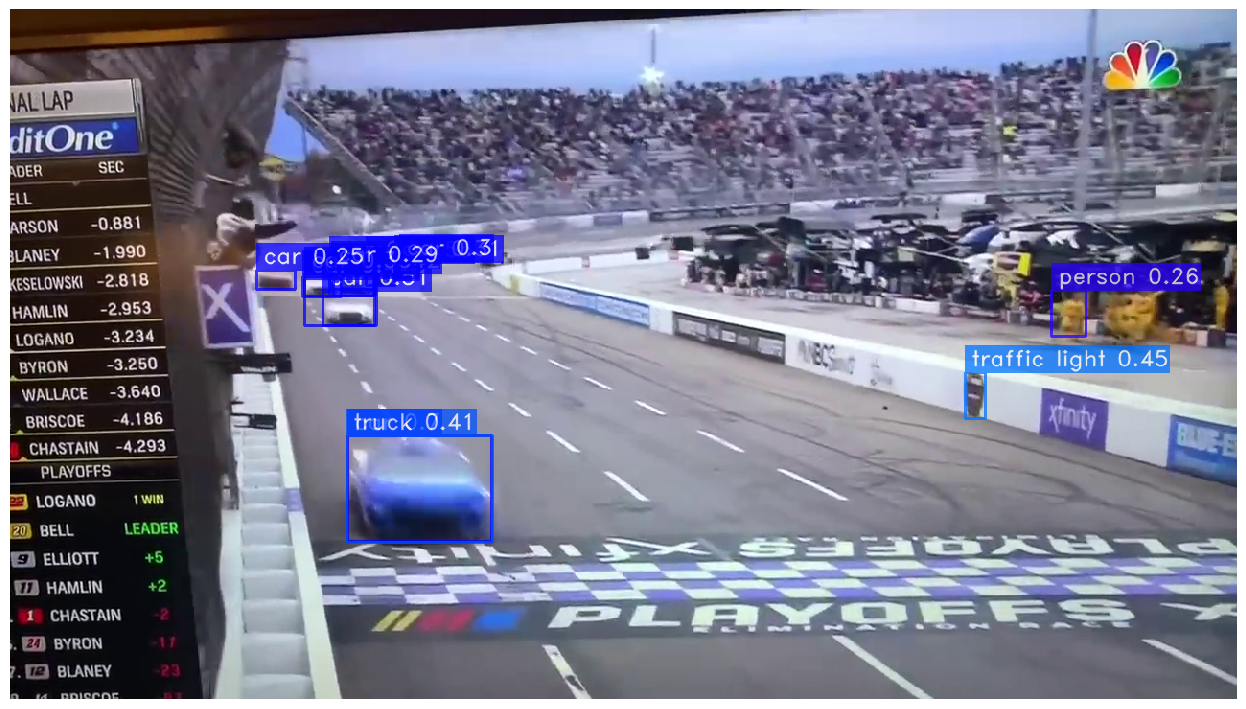

In [20]:
predictions[100].show()

You can see that the model has trouble correctly classifying objects in this blurred video frame.

## Create inference video

In [27]:
predictions.save('wall_ride.mp4')

## Use MoviePy to reconstruct the entire video with detections and sound

In [30]:
from moviepy.editor import VideoFileClip

videoclip = VideoFileClip(video_path)
audioclip = videoclip.audio

In [29]:
from moviepy.editor import CompositeAudioClip
detection_video = VideoFileClip('wall_ride.mp4')

# add sound and save
detection_video.audio = CompositeAudioClip([audioclip])
detection_video.write_videofile('wall_ride_with_audio.mp4')

Moviepy - Building video wall_ride_with_audio.mp4.
MoviePy - Writing audio in wall_ride_with_audioTEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/649 [00:00<?, ?it/s, now=None]

MoviePy - Done.
Moviepy - Writing video wall_ride_with_audio.mp4

